In [1]:
library(tidyverse)
options(repr.plot.width=10, repr.plot.height=4)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



### Load summary of results 

In [2]:
num_models = 10
summary =  read.csv("results summary_final.csv") %>% select(-contains("X")) %>% .[1:num_models,]
summary
names(summary)

,model,probe_model_ha,validation_accuracy_ha,Validation.results_ha.consistency,validation_verifiability_ha,Test.results_ha.accuracy,Test.results_ha.consistency,Test.results_ha.verifiability,Test.results_ha.f1,probe_model._hv,validation_accuracy_hv,validation_consistency_hv,validation_verifiability_hv,Test.results_hv..accuracy,Test.results_hv.consistency,Test.results_hv.verifiability,Test.results_hv.f1,Huggingface,Paper
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,roberta-large AdamW,roberta-large_ cloze_1_1e-05_5_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7670807,0.2763975,0.09316770,0.7578348,0.2535613,0.08262108,0.7573305,roberta-large_ cloze_1_1e-05_8_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7298137,0.2204969,0.09627329,0.7749288,0.2051282,0.08547009,0.7748995,https://github.com/sled-group/Verifiable-Coherent-NLU,https://arxiv.org/abs/2109.04947
2,roberta-large Adam,roberta-large_ cloze_1_1e-05_9_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7701863,0.2267081,0.09316770,0.7635328,0.2165242,0.06837607,0.7634099,roberta-large_ cloze_1_1e-05_4_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7608696,0.2577640,0.11180124,0.7549858,0.2193732,0.05128205,0.7549838,,
3,roberta-large SGD,,0.4751553,NA,0.00000000,NA,NA,NA,NA,,NA,NA,0.00000000,NA,NA,NA,NA,,
4,adapter CosmosQA Roberta-base,roberta-base_ cloze_1_1e-05_8_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7515528,0.2391304,0.04968944,0.7635328,0.2022792,0.03703704,0.7635328,roberta-base_ cloze_1_1e-05_9_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7173913,0.2515528,0.06211180,0.7122507,0.1794872,0.04273504,0.7121666,https://huggingface.co/AdapterHub/roberta-base-pf-cosmos_qa,https://arxiv.org/abs/2104.08247
5,BoolQ Roberta-base,shahrukhx01-roberta-base-boolq_ cloze_1_1e-05_6_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7329193,0.2236025,0.03726708,0.7378917,0.1737892,0.04273504,0.7377875,shahrukhx01-roberta-base-boolq_ cloze_1_1e-05_9_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7236025,0.1894410,0.05900621,0.7150997,0.1481481,0.03703704,0.7150789,https://huggingface.co/shahrukhx01/roberta-base-boolq,https://arxiv.org/abs/1905.10044
6,Hellaswag Roberta-large lr = 1e-5,prajjwal1-roberta_hellaswag_ cloze_1_1e-05_4_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7670807,0.2639752,0.08074534,0.7321937,0.1994302,0.04273504,0.7321742,prajjwal1-roberta_hellaswag_ cloze_1_1e-05_5_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7577640,0.2826087,0.12422360,0.7663818,0.2592593,0.09686610,0.7662888,https://huggingface.co/prajjwal1/roberta_hellaswag,https://arxiv.org/abs/1905.07830
7,Hellaswag Roberta-large lr = 1e-6,prajjwal1-roberta_hellaswag_ cloze_1_1e-06_9_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.6614907,NA,0.00621118,NA,NA,NA,NA,prajjwal1-roberta_hellaswag_ cloze_1_1e-06_9_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.6614907,NA,0.00621118,NA,NA,NA,NA,,
8,Aristo Roberta-large Fine Tuned on RACE,LIAMF-USP-aristo-roberta _cloze_1_1e-05_4_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7639752,0.2763975,0.07453416,0.7122507,0.2307692,0.05128205,0.7120170,LIAMF-USP-aristo-roberta_ cloze_1_1e-05_8_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7577640,0.2639752,0.09316770,0.7834758,0.1965812,0.06267806,0.7833333,,
9,RACE Roberta-large,LIAMF-USP-roberta-large-finetuned-race_ cloze_1_1e-05_5_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_ablate_attributes_states-logits,0.7670807,0.2391304,0.07453416,0.7692308,0.2564103,0.06267806,0.7689607,LIAMF-USP-roberta-large-finetuned-race_ cloze_1_1e-05_7_0.0-0.4-0.4-0.2-0.0_ tiered_pipeline_lc_a

[1] "model"                             "probe_model_ha"                   
 [3] "validation_accuracy_ha"            "Validation.results_ha.consistency"
 [5] "validation_verifiability_ha"       "Test.results_ha.accuracy"         
 [7] "Test.results_ha.consistency"       "Test.results_ha.verifiability"    
 [9] "Test.results_ha.f1"                "probe_model._hv"                  
[11] "validation_accuracy_hv"            "validation_consistency_hv"        
[13] "validation_verifiability_hv"       "Test.results_hv..accuracy"        
[15] "Test.results_hv.consistency"       "Test.results_hv.verifiability"    
[17] "Test.results_hv.f1"                "Huggingface"                      
[19] "Paper"

In [3]:
max_metrics_summary = summary %>% mutate(max_test_accu = pmax(`Test.results_ha.accuracy`, `Test.results_hv..accuracy`),
                   max_test_consist = pmax(`Test.results_ha.consistency`, `Test.results_hv.consistency`),
                   max_test_veri = pmax(`Test.results_ha.verifiability`, `Test.results_hv.verifiability`),
                   
                   max_dev_accu = pmax(`validation_accuracy_ha`, `validation_accuracy_hv`),
                   max_dev_consist = pmax(`validation_consistency_hv`, `Test.results_hv.consistency`),
                   max_dev_veri = pmax(validation_verifiability_ha, validation_verifiability_hv)) %>%
                   select(model, max_test_accu, max_test_veri, max_test_consist, max_dev_accu, max_dev_veri, max_dev_consist) 
max_metrics_summary

,model,max_test_accu,max_test_veri,max_test_consist,max_dev_accu,max_dev_veri,max_dev_consist
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,roberta-large AdamW,0.7749288,0.08547009,0.2535613,0.7670807,0.09627329,0.2204969
2,roberta-large Adam,0.7635328,0.06837607,0.2193732,0.7701863,0.11180124,0.2577640
3,roberta-large SGD,NA,NA,NA,NA,0.00000000,NA
4,adapter CosmosQA Roberta-base,0.7635328,0.04273504,0.2022792,0.7515528,0.06211180,0.2515528
5,BoolQ Roberta-base,0.7378917,0.04273504,0.1737892,0.7329193,0.05900621,0.1894410
6,Hellaswag Roberta-large lr = 1e-5,0.7663818,0.09686610,0.2592593,0.7670807,0.12422360,0.2826087
7,Hellaswag Roberta-large lr = 1e-6,NA,NA,NA,0.6614907,0.00621118,NA
8,Aristo Roberta-large Fine Tuned on RACE,0.7834758,0.06267806,0.2307692,0.7639752,0.09316770,0.2639752
9,RACE Roberta-large,0.7777778,0.06267806,0.2564103,0.7670807,0.10248447,0.2577640


In [4]:
names(max_metrics_summary) = c("Model", "Test Accuracy", "Test Verifiability", "Test Consistency",
                             "Validation Accuracy", "Validation Verifiability", "Validation Consistency")
max_metrics_summary

,Model,Test Accuracy,Test Verifiability,Test Consistency,Validation Accuracy,Validation Verifiability,Validation Consistency
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,roberta-large AdamW,0.7749288,0.08547009,0.2535613,0.7670807,0.09627329,0.2204969
2,roberta-large Adam,0.7635328,0.06837607,0.2193732,0.7701863,0.11180124,0.2577640
3,roberta-large SGD,NA,NA,NA,NA,0.00000000,NA
4,adapter CosmosQA Roberta-base,0.7635328,0.04273504,0.2022792,0.7515528,0.06211180,0.2515528
5,BoolQ Roberta-base,0.7378917,0.04273504,0.1737892,0.7329193,0.05900621,0.1894410
6,Hellaswag Roberta-large lr = 1e-5,0.7663818,0.09686610,0.2592593,0.7670807,0.12422360,0.2826087
7,Hellaswag Roberta-large lr = 1e-6,NA,NA,NA,0.6614907,0.00621118,NA
8,Aristo Roberta-large Fine Tuned on RACE,0.7834758,0.06267806,0.2307692,0.7639752,0.09316770,0.2639752
9,RACE Roberta-large,0.7777778,0.06267806,0.2564103,0.7670807,0.10248447,0.2577640


In [5]:
max_metrics_summary$Model

[1] "roberta-large\nAdamW"                     
 [2] "roberta-large\nAdam"                      
 [3] "roberta-large\nSGD"                       
 [4] "adapter\nCosmosQA Roberta-base"           
 [5] "BoolQ Roberta-base"                       
 [6] "Hellaswag Roberta-large\nlr = 1e-5"       
 [7] "Hellaswag Roberta-large\nlr = 1e-6"       
 [8] "Aristo Roberta-large \nFine Tuned on RACE"
 [9] "RACE Roberta-large"                       
[10] "adapter\nART Roberta-base"

### End and tiered task metrics: Accuracy, consistency, verifiability

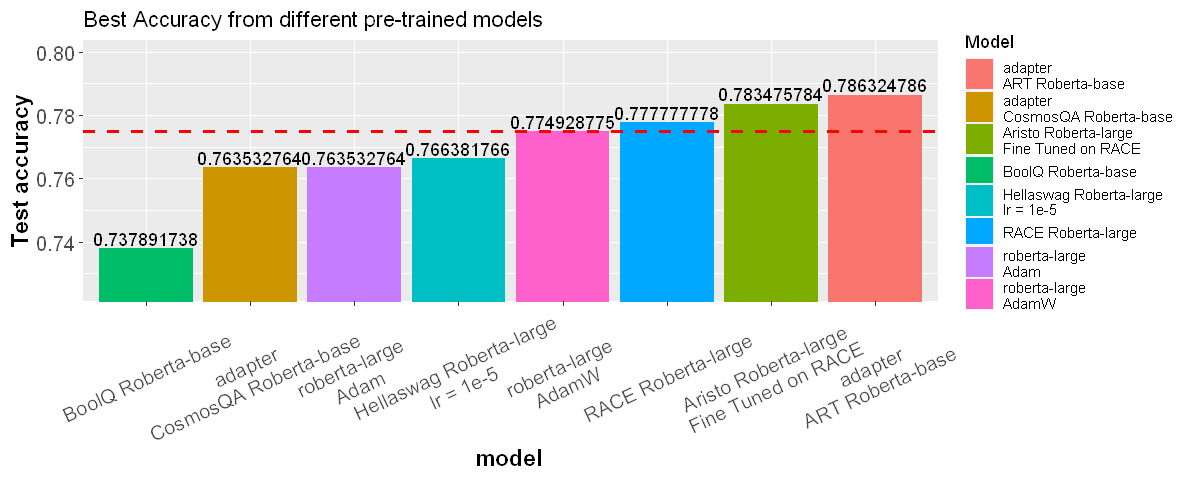

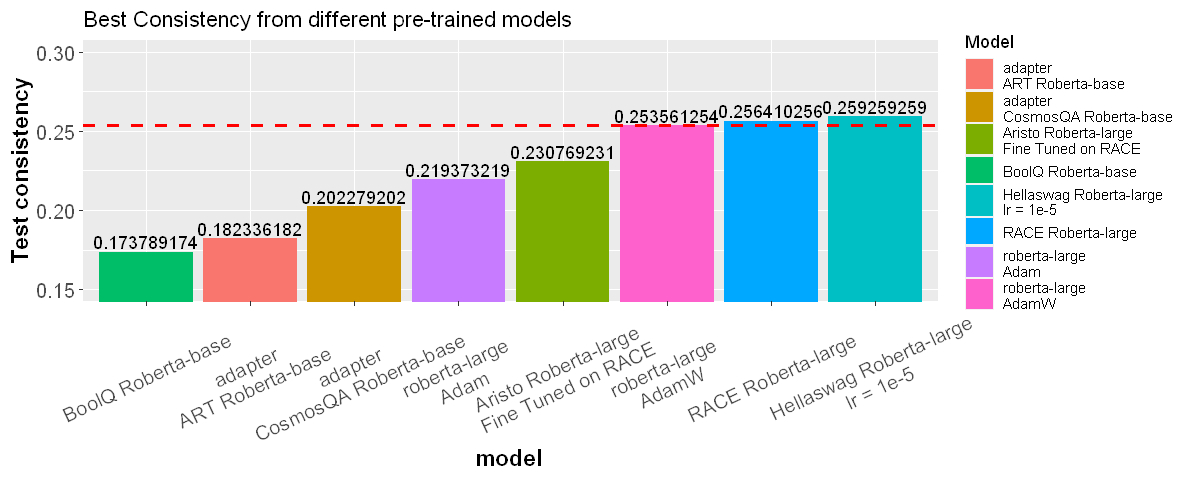

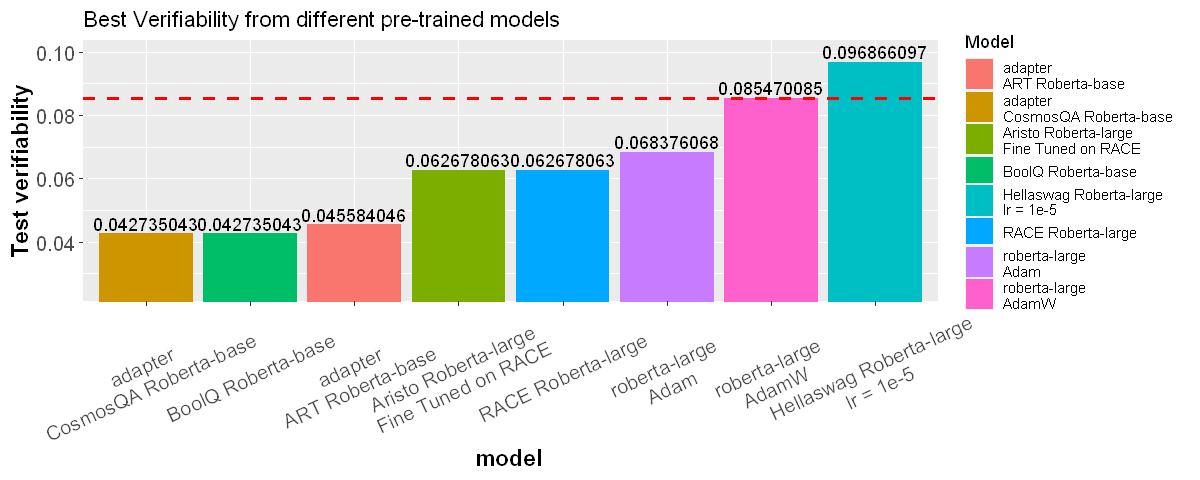

In [6]:
# Test accuracy
max_metrics_summary %>% filter(!is.na(`Test Verifiability`),!is.na(`Test Accuracy`), !is.na(`Test Consistency`)) %>% 
      ggplot(aes(x = reorder(Model, `Test Accuracy`), y = `Test Accuracy`, fill = Model)) +
      geom_col() +
      geom_hline(yintercept=max_metrics_summary %>% filter(Model == "roberta-large\nAdamW") %>% .$`Test Accuracy`, linetype="dashed", 
                color = "red", size=1) + labs(x = "model", y = "Test accuracy") + ggtitle("Best Accuracy from different pre-trained models") +
      geom_text(aes(label=`Test Accuracy`), position=position_dodge(width=0.9), vjust=-0.25) + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"), axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)) +
      coord_cartesian(ylim=c(0.725,0.8))

# Test Consistency
max_metrics_summary %>% filter(!is.na(`Test Verifiability`),!is.na(`Test Accuracy`), !is.na(`Test Consistency`)) %>% 
      ggplot(aes(x = reorder(Model, `Test Consistency`), y = `Test Consistency`, fill = Model)) +
      geom_col() +
      geom_hline(yintercept=max_metrics_summary %>% filter(Model == "roberta-large\nAdamW") %>% .$`Test Consistency`, linetype="dashed", 
                color = "red", size=1) + labs(x = "model", y = "Test consistency") + ggtitle("Best Consistency from different pre-trained models") +
      geom_text(aes(label=`Test Consistency`), position=position_dodge(width=0.9), vjust=-0.25) + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"), axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)) +
      coord_cartesian(ylim=c(0.15, 0.3))

# Test Verifiability
max_metrics_summary %>% filter(!is.na(`Test Verifiability`),!is.na(`Test Accuracy`), !is.na(`Test Consistency`) ) %>% 
      ggplot(aes(x = reorder(Model, `Test Verifiability`), y = `Test Verifiability`, fill = Model)) +
      geom_col() +
      geom_hline(yintercept=max_metrics_summary %>% filter(Model == "roberta-large\nAdamW") %>% .$`Test Verifiability`, linetype="dashed", 
                color = "red", size=1) + labs(x = "model", y = "Test verifiability") + ggtitle("Best Verifiability from different pre-trained models") +
      geom_text(aes(label=`Test Verifiability`), position=position_dodge(width=0.9), vjust=-0.25) + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"), axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)) +
      coord_cartesian(ylim=c(0.025,0.1))

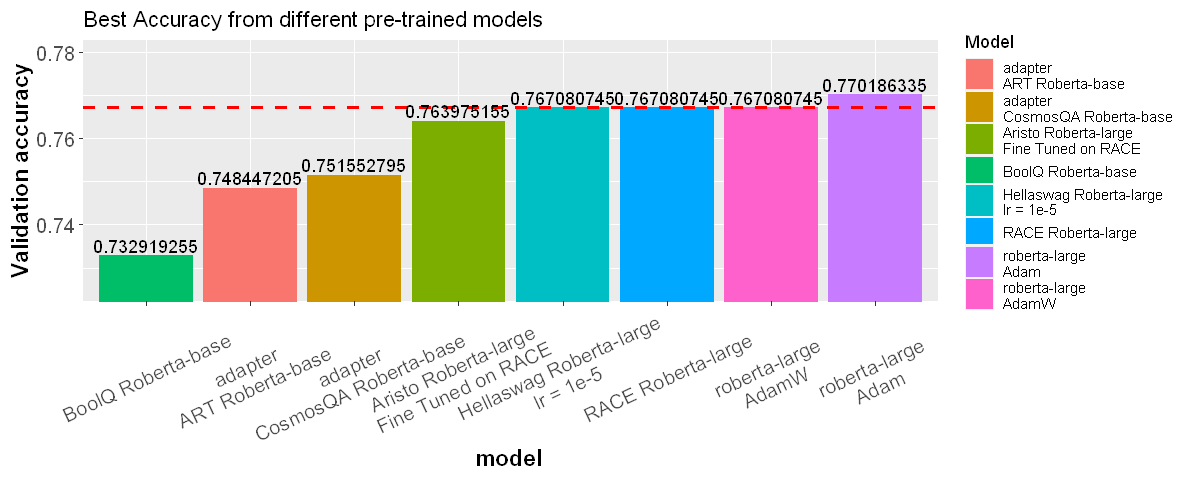

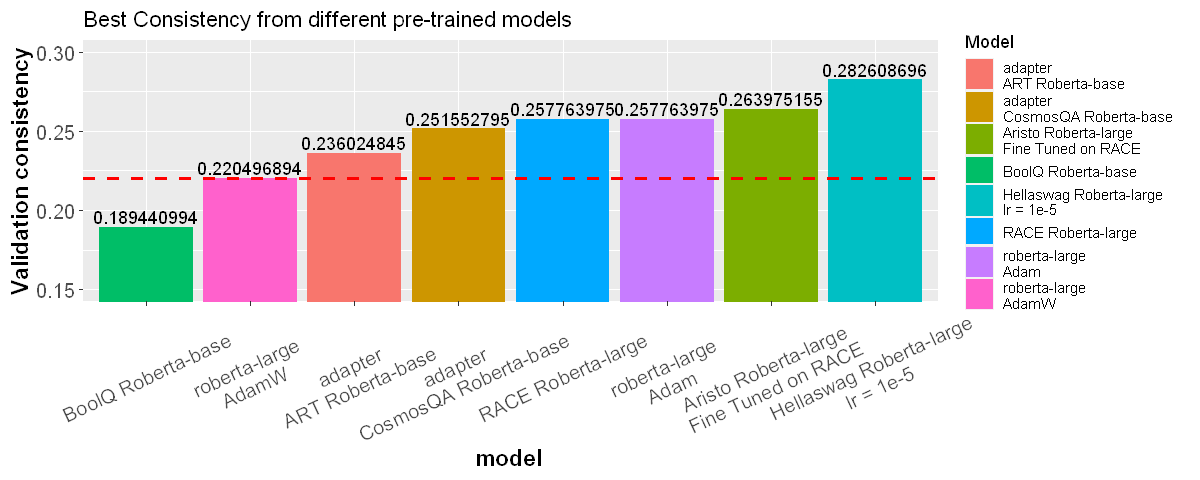

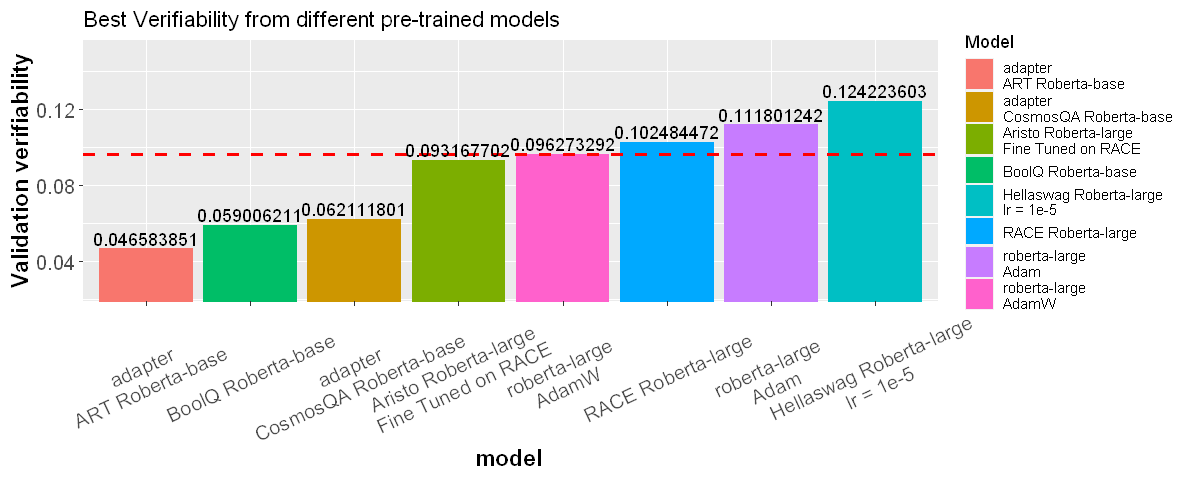

In [7]:
# Validation accuracy
max_metrics_summary %>% filter(!is.na(`Validation Verifiability`),!is.na(`Validation Accuracy`), !is.na(`Validation Consistency`)) %>% 
      ggplot(aes(x = reorder(Model, `Validation Accuracy`), y = `Validation Accuracy`, fill = Model)) +
      geom_col() +
      geom_hline(yintercept=max_metrics_summary %>% filter(Model == "roberta-large\nAdamW") %>% .$`Validation Accuracy`, linetype="dashed", 
                color = "red", size=1) + labs(x = "model", y = "Validation accuracy") + ggtitle("Best Accuracy from different pre-trained models") +
      geom_text(aes(label=`Validation Accuracy`), position=position_dodge(width=0.9), vjust=-0.25) + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"), axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)) +
      coord_cartesian(ylim=c(0.725,0.78))

# Validation Consistency
max_metrics_summary %>% filter(!is.na(`Validation Verifiability`),!is.na(`Validation Accuracy`), !is.na(`Validation Consistency`)) %>% 
      ggplot(aes(x = reorder(Model, `Validation Consistency`), y = `Validation Consistency`, fill = Model)) +
      geom_col() +
      geom_hline(yintercept=max_metrics_summary %>% filter(Model == "roberta-large\nAdamW") %>% .$`Validation Consistency`, linetype="dashed", 
                color = "red", size=1) + labs(x = "model", y = "Validation consistency") + ggtitle("Best Consistency from different pre-trained models") +
      geom_text(aes(label=`Validation Consistency`), position=position_dodge(width=0.9), vjust=-0.25) + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"), axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)) +
      coord_cartesian(ylim=c(0.15,0.3))

# Validation Verifiability
max_metrics_summary %>% filter(!is.na(`Validation Verifiability`),!is.na(`Validation Accuracy`), !is.na(`Validation Consistency`) ) %>% 
      ggplot(aes(x = reorder(Model, `Validation Verifiability`), y = `Validation Verifiability`, fill = Model)) +
      geom_col() +
      geom_hline(yintercept=max_metrics_summary %>% filter(Model == "roberta-large\nAdamW") %>% .$`Validation Verifiability`, linetype="dashed", 
                color = "red", size=1) + labs(x = "model", y = "Validation verifiability") + ggtitle("Best Verifiability from different pre-trained models") +
      geom_text(aes(label=`Validation Verifiability`), position=position_dodge(width=0.9), vjust=-0.25) + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"), axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)) +
      coord_cartesian(ylim=c(0.025,0.15))

### Average relative transfer gain (RTG)

In [8]:
# test baseline 
baseline_TA = max_metrics_summary %>% filter(Model == "roberta-large\nAdamW") %>% .$"Test Accuracy"
baseline_TV = max_metrics_summary %>% filter(Model == "roberta-large\nAdamW") %>% .$"Test Verifiability"
baseline_TC = max_metrics_summary %>% filter(Model == "roberta-large\nAdamW") %>% .$"Test Consistency"

# validation baseline 
baseline_VA = max_metrics_summary %>% filter(Model == "roberta-large\nAdamW") %>% .$"Validation Accuracy"
baseline_VV = max_metrics_summary %>% filter(Model == "roberta-large\nAdamW") %>% .$"Validation Verifiability"
baseline_VC = max_metrics_summary %>% filter(Model == "roberta-large\nAdamW") %>% .$"Validation Consistency"

In [12]:
RTG_summary = max_metrics_summary %>% mutate(RTG_test_acc = round(100 * (`Test Accuracy` - baseline_TA), 5),
                               RTG_test_consist = round(100 * (`Test Consistency` - baseline_TC),5),
                               RTG_test_veri = round(100 * (`Test Verifiability` - baseline_TV),5),
                               RTG_vali_acc = round(100 * (`Validation Accuracy` - baseline_VA),5),
                               RTG_vali_consist = round(100 * (`Validation Consistency` - baseline_VC),5),
                               RTG_vali_veri = round(100 * (`Validation Verifiability` - baseline_VV),5)) %>%
                        select(Model, contains("RTG"))
RTG_summary

,Model,RTG_test_acc,RTG_test_consist,RTG_test_veri,RTG_vali_acc,RTG_vali_consist,RTG_vali_veri
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,roberta-large AdamW,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000
2,roberta-large Adam,-1.1396,-3.41880,-1.7094,0.31056,3.72671,1.55280
3,roberta-large SGD,NA,NA,NA,NA,NA,-9.62733
4,adapter CosmosQA Roberta-base,-1.1396,-5.12821,-4.2735,-1.55279,3.10559,-3.41615
5,BoolQ Roberta-base,-3.7037,-7.97721,-4.2735,-3.41615,-3.10559,-3.72671
6,Hellaswag Roberta-large lr = 1e-5,-0.8547,0.56980,1.1396,0.00000,6.21118,2.79503
7,Hellaswag Roberta-large lr = 1e-6,NA,NA,NA,-10.55901,NA,-9.00621
8,Aristo Roberta-large Fine Tuned on RACE,0.8547,-2.27920,-2.2792,-0.31056,4.34783,-0.31056
9,RACE Roberta-large,0.2849,0.28490,-2.2792,0.00000,3.72671,0.62112


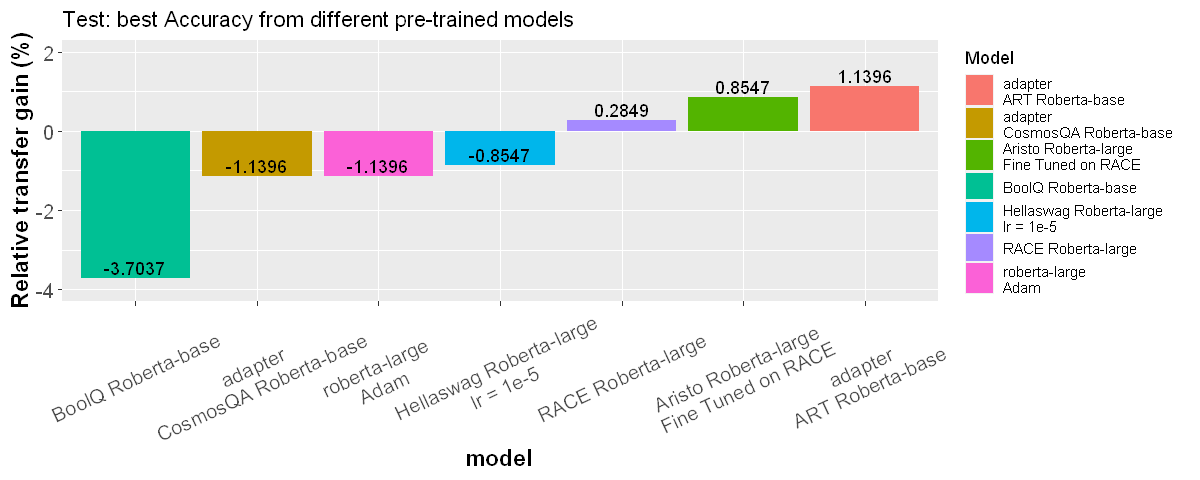

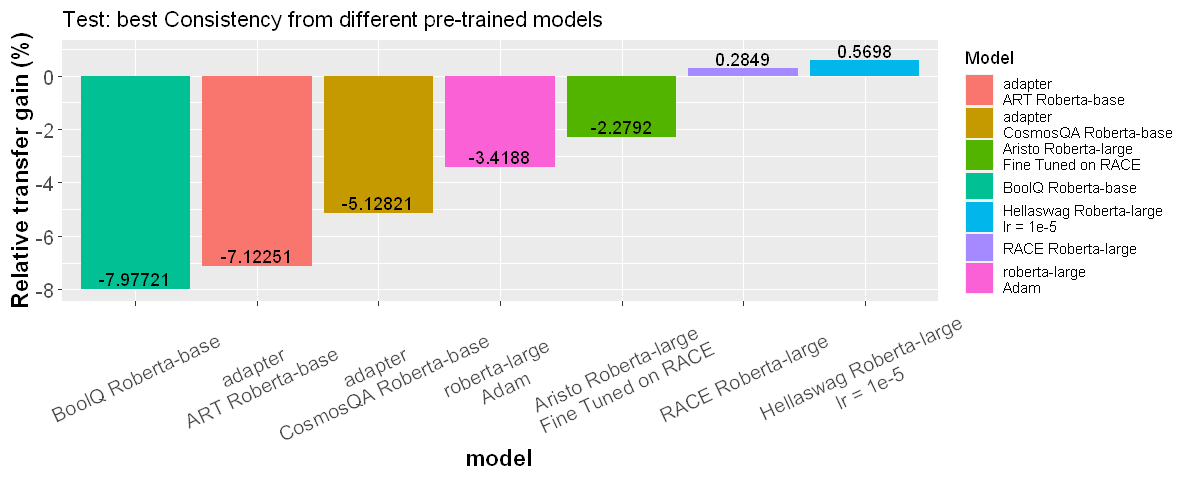

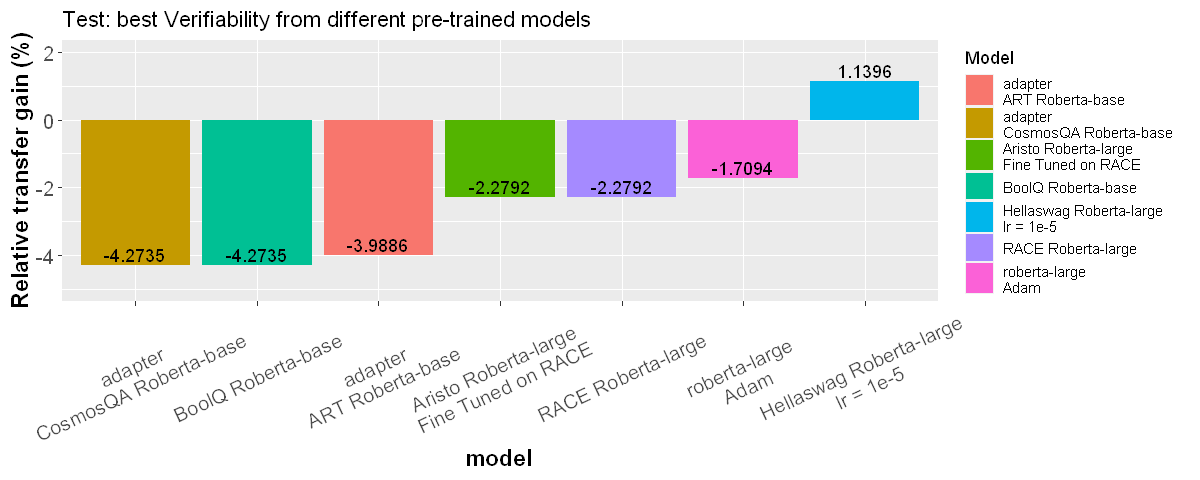

In [16]:
# Test accuracy
RTG_summary %>% filter(!is.na(`RTG_test_acc`),!is.na(`RTG_test_consist`), !is.na(`RTG_test_veri`)) %>% filter(Model != "roberta-large\nAdamW") %>% 
      ggplot(aes(x = reorder(Model, `RTG_test_acc`), y = `RTG_test_acc`, fill = Model)) +
      geom_col() +  labs(x = "model", y = "Relative transfer gain (%)") + ggtitle("Test: best Accuracy from different pre-trained models") +
      geom_text(aes(label=`RTG_test_acc`), position=position_dodge(width=0.9), vjust=-0.25) + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"), axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)) +
      coord_cartesian(ylim=c(-4,2))

# Test Consistency
RTG_summary %>% filter(!is.na(`RTG_test_acc`),!is.na(`RTG_test_consist`), !is.na(`RTG_test_veri`)) %>% filter(Model != "roberta-large\nAdamW") %>%
      ggplot(aes(x = reorder(Model, `RTG_test_consist`), y = `RTG_test_consist`, fill = Model)) +
      geom_col() + labs(x = "model", y = "Relative transfer gain (%)") + ggtitle("Test: best Consistency from different pre-trained models") +
      geom_text(aes(label=`RTG_test_consist`), position=position_dodge(width=0.9), vjust=-0.25) + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"), axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)) +
      coord_cartesian(ylim=c(-8,0.9))

# Test Verifiability
RTG_summary %>% filter(!is.na(`RTG_test_acc`),!is.na(`RTG_test_consist`), !is.na(`RTG_test_veri`)) %>% filter(Model != "roberta-large\nAdamW") %>%
      ggplot(aes(x = reorder(Model, `RTG_test_veri`), y = `RTG_test_veri`, fill = Model)) +
      geom_col() + labs(x = "model", y = "Relative transfer gain (%)") + ggtitle("Test: best Verifiability from different pre-trained models") +
      geom_text(aes(label=`RTG_test_veri`), position=position_dodge(width=0.9), vjust=-0.25) + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"), axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)) +
      coord_cartesian(ylim=c(-5,2))

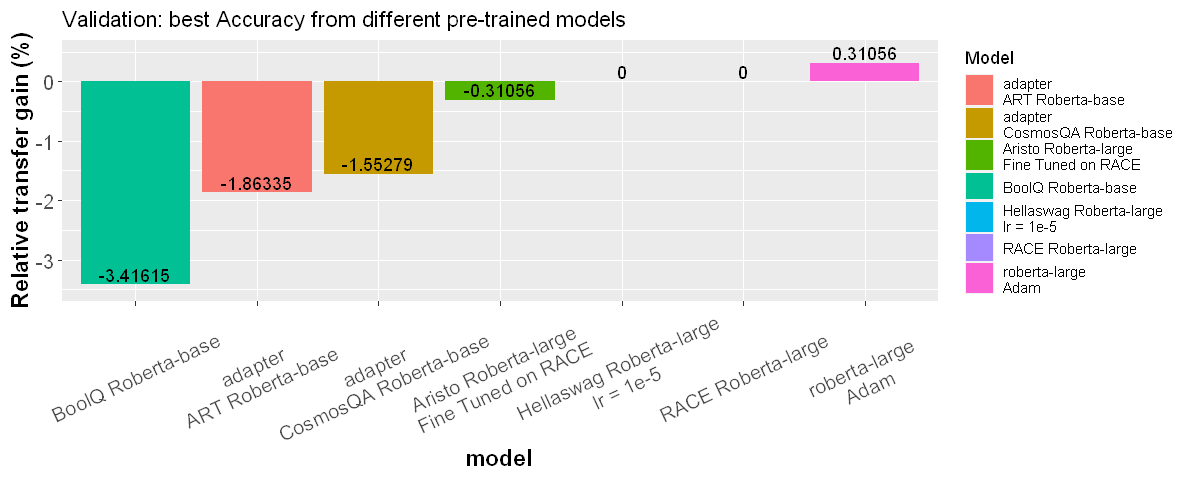

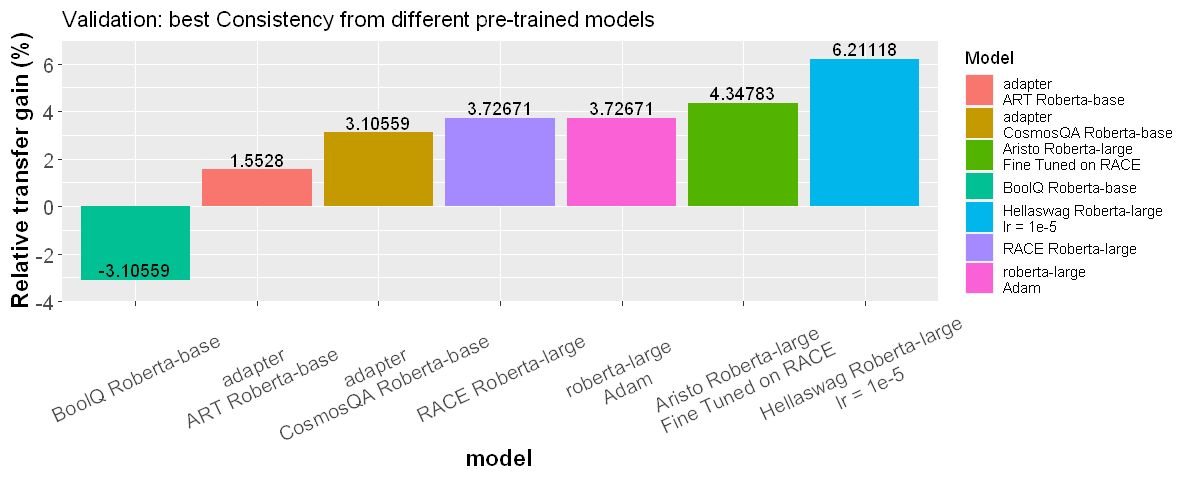

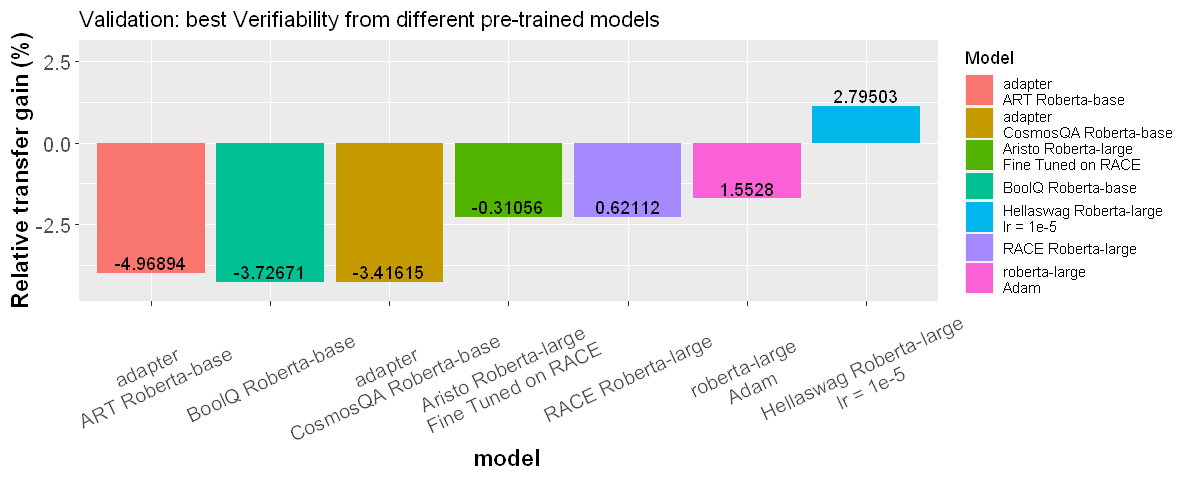

In [33]:
# Validation accuracy
RTG_summary %>% filter(!is.na(`RTG_vali_acc`),!is.na(`RTG_vali_consist`), !is.na(`RTG_vali_veri`)) %>% filter(Model != "roberta-large\nAdamW") %>% 
      ggplot(aes(x = reorder(Model, `RTG_vali_acc`), y = `RTG_vali_acc`, fill = Model)) +
      geom_col() +  labs(x = "model", y = "Relative transfer gain (%)") + ggtitle("Validation: best Accuracy from different pre-trained models") +
      geom_text(aes(label=`RTG_vali_acc`), position=position_dodge(width=0.9), vjust=-0.25) + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"), axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)) +
      coord_cartesian(ylim=c(-3.5,0.5))

# Validation Consistency
RTG_summary %>% filter(!is.na(`RTG_vali_acc`),!is.na(`RTG_vali_consist`), !is.na(`RTG_vali_veri`)) %>% filter(Model != "roberta-large\nAdamW") %>%
      ggplot(aes(x = reorder(Model, `RTG_vali_consist`), y = `RTG_vali_consist`, fill = Model)) +
      geom_col() + labs(x = "model", y = "Relative transfer gain (%)") + ggtitle("Validation: best Consistency from different pre-trained models") +
      geom_text(aes(label=`RTG_vali_consist`), position=position_dodge(width=0.9), vjust=-0.25) + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"), axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)) +
      coord_cartesian(ylim=c(-3.5,6.5))

# Validation Verifiability
RTG_summary %>% filter(!is.na(`RTG_vali_acc`),!is.na(`RTG_vali_consist`), !is.na(`RTG_vali_veri`)) %>% filter(Model != "roberta-large\nAdamW") %>%
      ggplot(aes(x = reorder(Model, `RTG_vali_veri`), y = `RTG_test_veri`, fill = Model)) +
      geom_col() + labs(x = "model", y = "Relative transfer gain (%)") + ggtitle("Validation: best Verifiability from different pre-trained models") +
      geom_text(aes(label=`RTG_vali_veri`), position=position_dodge(width=0.9), vjust=-0.25) + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"), axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.5)) +
      coord_cartesian(ylim=c(-4.5,2.8))

### Base vs Large vs Optimizer 

In [69]:
optimizer = RTG_summary %>% filter(Model %in% c("roberta-large\nAdamW", "roberta-large\nAdam", "roberta-large\nSGD"))
large = RTG_summary %>% filter(!(Model %in% 
                                 c("roberta-large\nAdamW", "roberta-large\nAdam", "roberta-large\nSGD", "Hellaswag Roberta-large\nlr = 1e-6")), 
                               grepl("large", Model)) %>% select(-Model)
base = RTG_summary %>% filter(!(Model %in% 
                                 c("roberta-large\nAdamW", "roberta-large\nAdam", "roberta-large\nSGD", "Hellaswag Roberta-large\nlr = 1e-6")), 
                               grepl("base", Model)) %>% select(-Model)

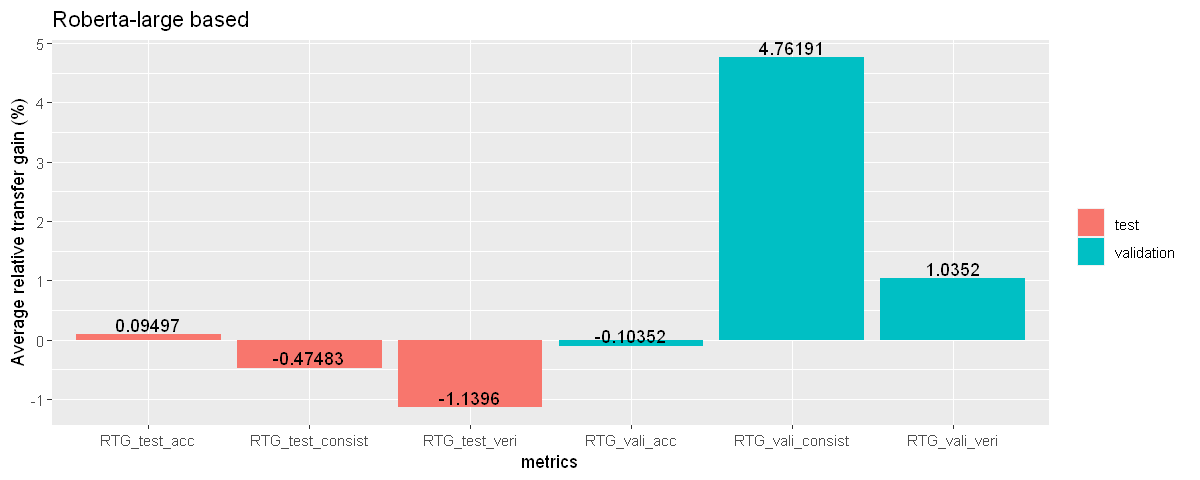

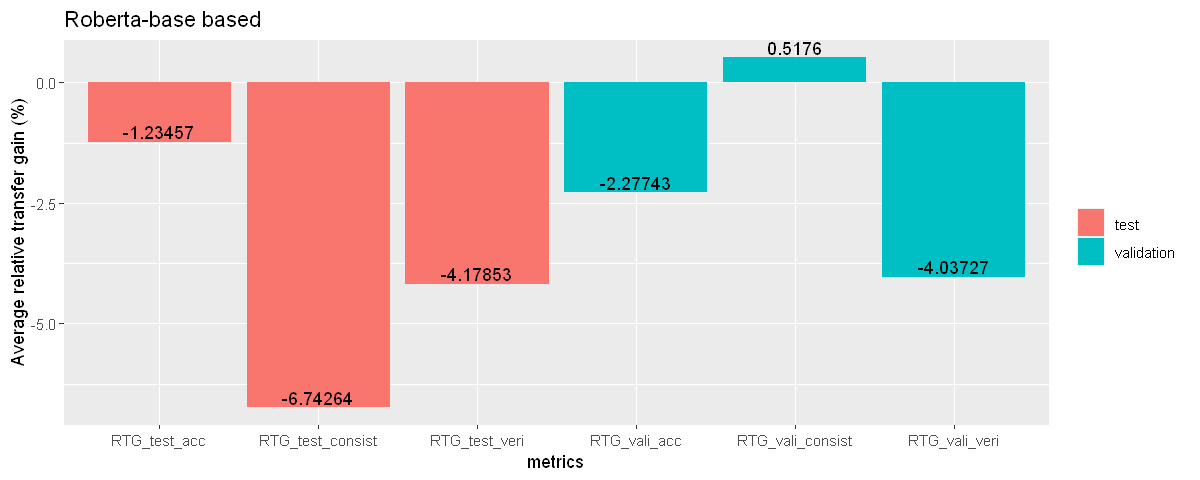

In [138]:
metrics = names(large)
large_summary_table = as.data.frame(round(colMeans(large), 5))
names(large_summary_table) = "Roberta-large based"
rownames(large_summary_table) = NULL
large_summary_table = large_summary_table %>% mutate(metrics = metrics, test_vali = c(rep("test", 3), rep("validation", 3)))
# large_summary_table

large_summary_table %>% ggplot(aes(x = metrics, y = `Roberta-large based`, fill = test_vali)) + geom_col() +
      geom_text(aes(label=`Roberta-large based`), position=position_dodge(width=0.9), vjust=-0.25) + 
    theme(legend.title = element_blank()) +
    ggtitle("Roberta-large based") + ylab("Average relative transfer gain (%)")


metrics = names(base)
base_summary_table = as.data.frame(round(colMeans(base), 5))
names(base_summary_table) = "Roberta-base based"
rownames(base_summary_table) = NULL
base_summary_table = base_summary_table %>% mutate(metrics = metrics, test_vali = c(rep("test", 3), rep("validation", 3)))
# base_summary_table

base_summary_table %>% ggplot(aes(x = metrics, y = `Roberta-base based`, fill = test_vali)) + geom_col() +
      geom_text(aes(label=`Roberta-base based`), position=position_dodge(width=0.9), vjust=-0.25) + 
    theme(legend.title = element_blank()) +
    ggtitle("Roberta-base based") + ylab("Average relative transfer gain (%)")